Import CSV and plot

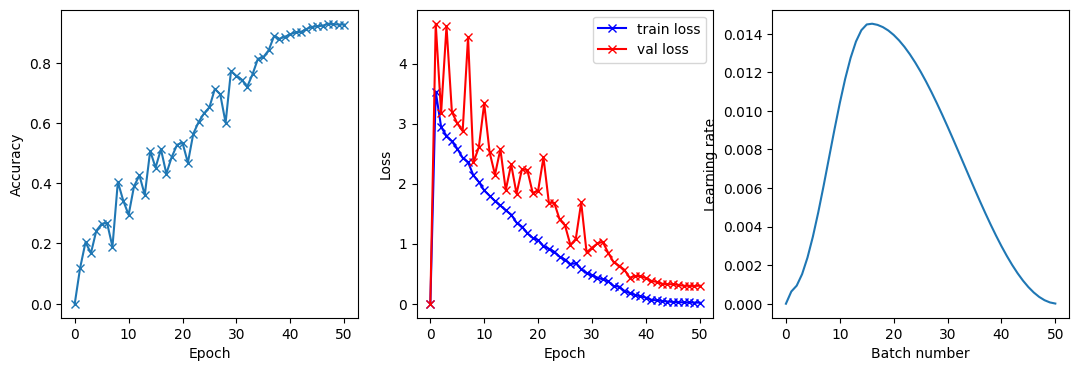

In [12]:
import pandas as pd
import processing

root = './output/resnet_20230219_013837.csv'
history = pd.read_csv(root)
processing.plot_history(history)

In [6]:
from datasets.openflowers import Flowers
from datasets.openflowers import test_transform, train_transform
from torch.utils.data import DataLoader

train_data = Flowers(
    split = 'train',
    image_root = './data/flowers-102/jpg/',
    transform = train_transform
)

In [7]:
train_dl = DataLoader(train_data, batch_size = 64, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


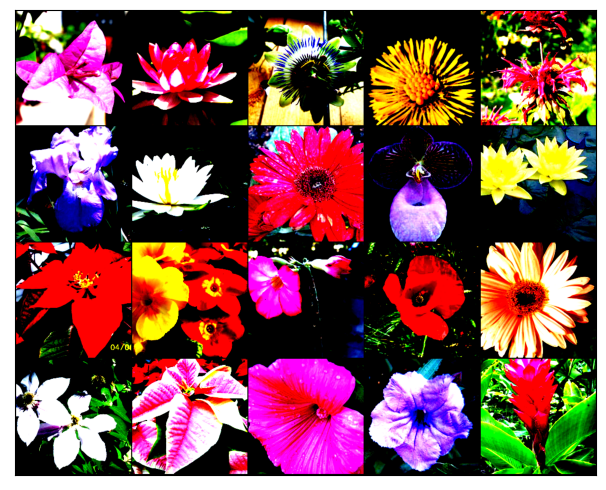

5999

In [11]:
from functions import show_batch
show_batch(train_dl)
len(train_data)